# Dog breed image classifcation

   **This dataset contains a collection of images for 10 different dog breeds, meticulously gathered and organized to facilitate various computer vision tasks such as image classification and object detection. The dataset includes the following breeds:**

   * Golden Retriever
   * German Shepherd
   * Labrador Retriever
   * Bulldog
   * Beagle
   * Poodle
   * Rottweiler
   * Yorkshire Terrier
   * Boxer
   * Dachshund
   
**Each breed is represented by 100 images, stored in separate directories named after the respective breed. The images have been curated to ensure diversity and relevance, making this dataset a valuable resource for training and evaluating machine learning models in the field of computer vision.**

# Importing

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os.path
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

# Preparing the data

In [95]:
data = 'Kaggle/dogs'

classes = os.listdir(data)

img_dir = Path(data)

file_paths = list(img_dir.glob(r'**/*.jpg')) + list(img_dir.glob(r'**/*.jpeg')) + list(img_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_paths))

path = pd.Series(file_paths, name = 'Path').astype(str)
label = pd.Series(labels, name = 'Labels')

df = pd.concat([path, label], axis = 1)

df

,Path,Labels
0,Kaggle\dogs\Beagle\Beagle_1.jpg,Beagle
1,Kaggle\dogs\Beagle\Beagle_10.jpg,Beagle
2,Kaggle\dogs\Beagle\Beagle_100.jpg,Beagle
3,Kaggle\dogs\Beagle\Beagle_11.jpg,Beagle
4,Kaggle\dogs\Beagle\Beagle_12.jpg,Beagle
...,...,...
962,Kaggle\dogs\Yorkshire_Terrier\Yorkshire Terrie...,Yorkshire_Terrier
963,Kaggle\dogs\Yorkshire_Terrier\Yorkshire Terrie...,Yorkshire_Terrier
964,Kaggle\dogs\Yorkshire_Terrier\Yorkshire Terrie...,Yorkshire_Terrier
965,Kaggle\dogs\Yorkshire_Terrier\Yorkshire Terrie...,Yorkshire_Terrier


# Splitting up the data

In [74]:
train_df, dummy_df = train_test_split(df, test_size = 0.2)
val_df, test_df = train_test_split(dummy_df, test_size = 0.4)

# Generating different images

**With this feature our models will be able to train on images, that has different attributions, giving more opportunity to learn.**

In [75]:
img_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.1,
    vertical_flip = True,
    fill_mode = 'nearest')

# Loading in the data

In [76]:
train_img = img_gen.flow_from_dataframe(
    train_df,
    x_col = 'Path',
    y_col = 'Labels',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')

val_img = img_gen.flow_from_dataframe(
    val_df,
    x_col = 'Path',
    y_col = 'Labels',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')

test_img = img_gen.flow_from_dataframe(
    test_df,
    x_col = 'Path',
    y_col = 'Labels',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical')

Found 773 validated image filenames belonging to 10 classes.
Found 116 validated image filenames belonging to 10 classes.
Found 78 validated image filenames belonging to 10 classes.


# Creating our CNN model

In [89]:
model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')

pretrained_model.trainable = False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(classes), activation = 'softmax'))

callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    restore_best_weights = True,
    patience = 5)

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(train_img, validation_data = val_img, epochs = 15, callbacks = [callback])

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 805ms/step - accuracy: 0.3840 - loss: 1.9732 - val_accuracy: 0.7500 - val_loss: 0.7606
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 682ms/step - accuracy: 0.8388 - loss: 0.5532 - val_accuracy: 0.7328 - val_loss: 0.5959
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 657ms/step - accuracy: 0.8951 - loss: 0.3855 - val_accuracy: 0.9224 - val_loss: 0.2944
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 637ms/step - accuracy: 0.9381 - loss: 0.2454 - val_accuracy: 0.9052 - val_loss: 0.3276
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 686ms/step - accuracy: 0.9387 - loss: 0.2235 - val_accuracy: 0.9138 - val_loss: 0.2471
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 605ms/step - accuracy: 0.9516 - loss: 0.1675 - val_accuracy: 0.9224 - val_loss: 0.2616
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 545ms/step - accuracy: 0.9501 - loss: 0.1590 - val_accuracy: 0.9828 - val_loss: 0.1502
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 529ms/step - accuracy: 0.9715 - loss: 0.0933 - val_accu

In [90]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,249,504 (12.40 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 661,014 (2.52 MB)

# Plotting out our model perfomance

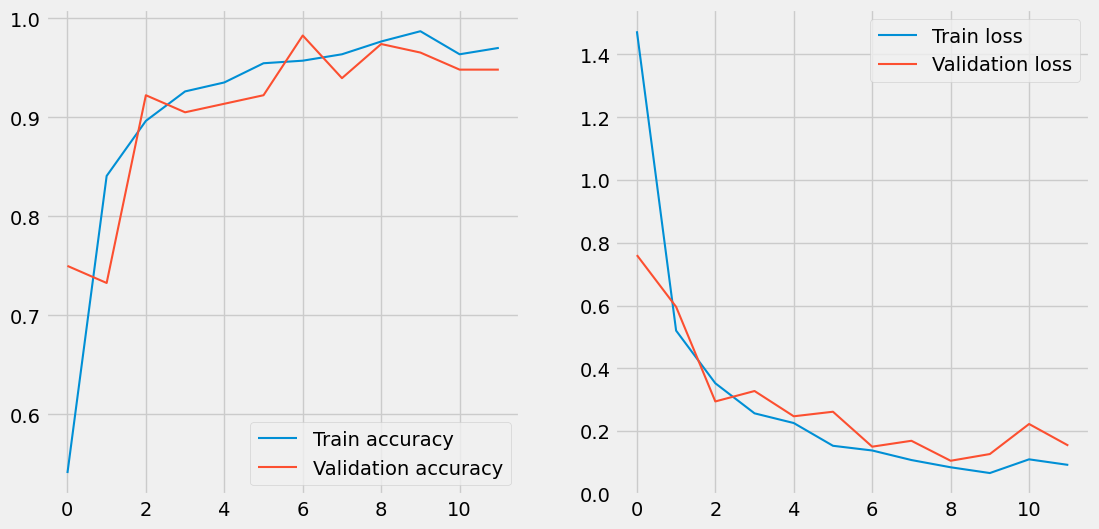

In [91]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'], linewidth = 1.5, label = 'Train accuracy')
ax1.plot(history.history['val_accuracy'], linewidth = 1.5, label = 'Validation accuracy')
ax1.legend()

ax2.plot(history.history['loss'], linewidth = 1.5, label = 'Train loss')
ax2.plot(history.history['val_loss'], linewidth = 1.5, label = 'Validation loss')
ax2.legend()

plt.show()

# Evaluating the model on the test dataset

In [92]:
model.evaluate(test_img)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.9936 - loss: 0.1164


[0.12443305552005768, 0.9871794581413269]

# Prediction on the dataset

In [93]:
prediction = model.predict(test_img)
y_prediction = np.argmax(prediction, axis = 1)

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002DBE39E5120> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step  


# Results

In [94]:
print(classification_report(test_img.classes, y_prediction, target_names = classes))

                    precision    recall  f1-score   support

            Beagle       1.00      1.00      1.00         7
             Boxer       1.00      0.93      0.96        14
           Bulldog       1.00      1.00      1.00         8
         Dachshund       1.00      0.80      0.89        10
   German_Shepherd       0.88      1.00      0.93         7
  Golden_Retriever       1.00      1.00      1.00         5
Labrador_Retriever       1.00      1.00      1.00         6
            Poodle       1.00      1.00      1.00         5
        Rottweiler       0.75      1.00      0.86         6
 Yorkshire_Terrier       1.00      1.00      1.00        10

          accuracy                           0.96        78
         macro avg       0.96      0.97      0.96        78
      weighted avg       0.97      0.96      0.96        78

